In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
dataset = pd.read_csv('../Resources/diagnosis-of-covid-19-and-its-clinical-spectrum.csv')
dataset.tail()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
5639,ae66feb9e4dc3a0,3,positive,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,f,f,f,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,f,f,f,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataset_new = dataset[["patient_id","patient_age_quantile","sars_cov_2_exam_result","hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]].copy()
dataset_new.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose
0,44477f75e8169d2,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648
2,a46b4402a0e5696,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
print(len(dataset_new.index))

5644


In [54]:
list_X = ["patient_age_quantile","hematocrit","hemoglobin","platelets","mean_platelet_volume","red_blood_cells","lymphocytes","mean_corpuscular_hemoglobin_concentration_mchc","leukocytes","basophils","mean_corpuscular_hemoglobin_mch","eosinophils","mean_corpuscular_volume_mcv","monocytes","red_blood_cell_distribution_width_rdw","serum_glucose"]

In [55]:
X = dataset_new[list_X].values
y = dataset_new["sars_cov_2_exam_result"].values
print(X)

[[13.                 nan         nan ...         nan         nan
          nan]
 [17.          0.23651545 -0.02234027 ...  0.35754666 -0.62507266
  -0.14064808]
 [ 8.                 nan         nan ...         nan         nan
          nan]
 ...
 [ 4.                 nan         nan ...         nan         nan
          nan]
 [10.                 nan         nan ...         nan         nan
          nan]
 [19.          0.69428688  0.54156393 ...  0.5676524  -0.18279028
          nan]]


In [56]:
print(y)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'positive']


In [57]:

print(len(list_X))

16


In [58]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:len(list_X)])
X[:, 1:len(list_X)] = imputer.transform(X[:, 1:len(list_X)])

In [59]:
print(X)

[[ 1.30000000e+01 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.70000000e+01  2.36515447e-01 -2.23402679e-02 ...  3.57546657e-01
  -6.25072658e-01 -1.40648082e-01]
 [ 8.00000000e+00 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 ...
 [ 4.00000000e+00 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.00000000e+01 -2.18621415e-09 -1.60131883e-08 ... -3.22011376e-09
   1.02043253e-08  7.06999220e-09]
 [ 1.90000000e+01  6.94286883e-01  5.41563928e-01 ...  5.67652404e-01
  -1.82790279e-01  7.06999220e-09]]


In [60]:
#encoding variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 1]


In [61]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

In [62]:
#Scale the data using the MinMaxScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [63]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9129859825443004
Testing Data Score: 0.90552871712292


In [66]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09447128287707998, R2: 0.90552871712292


In [67]:
predictions = model.predict(X_test_scaled)

prediction_actual = {
    'Actual': y_test,
    'Prediction': predictions
}

df = pd.DataFrame(prediction_actual)
df = df.set_index('Actual').reset_index()
df.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [68]:
# list of all the X columns
feature_names = list_X
print(feature_names)

['patient_age_quantile', 'hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils', 'mean_corpuscular_volume_mcv', 'monocytes', 'red_blood_cell_distribution_width_rdw', 'serum_glucose']


In [69]:
# Determine which features should to be kept
preSelected_features = sorted(zip(model.feature_importances_, feature_names), reverse=True)
ranked_features = pd.DataFrame(preSelected_features, columns=['Score', 'Feature'])
ranked_features = ranked_features.set_index('Feature')
ranked_features

,Score
Feature,
patient_age_quantile,0.212447
leukocytes,0.144697
monocytes,0.085374
platelets,0.082856
eosinophils,0.055055
lymphocytes,0.049239
red_blood_cells,0.048816
hematocrit,0.048068
mean_platelet_volume,0.040829


In [70]:
# Remove features with score < 0.039
selected_features = []
for tup in preSelected_features:
    if tup[0] > 0.039:
        selected_features.append(tup[1])
print(selected_features)        

['patient_age_quantile', 'leukocytes', 'monocytes', 'platelets', 'eosinophils', 'lymphocytes', 'red_blood_cells', 'hematocrit', 'mean_platelet_volume', 'hemoglobin']


In [71]:
with open("selected_features.txt", "w") as output:
    output.write(str(selected_features))

In [73]:
# Use new data for all subsequent models
# Assign new data to X 

X2 = dataset_new[selected_features].values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X2[:, 1:len(selected_features)])
X2[:, 1:len(selected_features)] = imputer.transform(X2[:, 1:len(selected_features)])
#print(X2)
# split data into training and testing
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size= 0.33, random_state=42)
X2_scaler = StandardScaler().fit(X2_train)
X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)
#print(X2_train_scaled)
#print(X2_test_scaled)

In [74]:
# Train new model
model2 = RandomForestClassifier(n_estimators=200)
model2.fit(X2_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
print(f"Training Data Score: {model2.score(X2_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X2_test_scaled, y_test)}")

Training Data Score: 0.9129859825443004
Testing Data Score: 0.90552871712292


In [76]:
predictions_1 = model2.predict(X2_test_scaled)
MSE_1 = mean_squared_error(y_test, predictions_1)
r2_1 = model2.score(X2_test_scaled, y_test)

print(f"MSE: {MSE_1}, R2: {r2_1}")

MSE: 0.09447128287707998, R2: 0.90552871712292


In [77]:
# Create the RandomSearchCV model
from sklearn.model_selection import GridSearchCV
model3 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 600, 1200, 1400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [14, 15, 16, 17, 18, None]
}
grid = GridSearchCV(model3, param_grid, cv=5, verbose=3, n_jobs=-1)

# Train the model with GridSearch
grid.fit(X2_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 14, 'max_features': 'auto', 'n_estimators': 200}
0.9000265598680395


In [79]:
# Tuned parameters
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
criterion = 'entropy'

# Tuned model
tuned_model = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators, 
                                     criterion=criterion, max_depth=max_depth, random_state=42)
tuned_model.fit(X2_train_scaled, y_train)
model_3_training_score = round(tuned_model.score(X2_train_scaled, y_train)*100,3)
tuned_accuracy = round(tuned_model.score(X2_test_scaled, y_test)*100,3)

print(f"Training Data Score: {model_3_training_score} %")
print(f"Testing Data Score: {tuned_accuracy} %")

Training Data Score: 91.299 %
Testing Data Score: 90.499 %


In [80]:
predictions_2 = tuned_model.predict(X2_test_scaled)

prediction_actual_2 = {
    'Actual': y_test,
    'Prediction': predictions_2
}

df2 = pd.DataFrame(prediction_actual_2)
df2 = df2.set_index('Actual').reset_index()
df2.head(100)

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,0,0
98,0,0


In [81]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions_2)
tn, fp, fn, tp = confusion_matrix(y_test, predictions_2).ravel()

In [82]:
print ('Confusion Matrix :')
print(cm) 
print(tn, fp, fn, tp) 
print ('Accuracy Score :',accuracy_score(y_test, predictions_2) )
print ('Report : ')
print (classification_report(y_test, predictions_2) )

Confusion Matrix :
[[1676    9]
 [ 168   10]]
1676 9 168 10
Accuracy Score : 0.9049919484702094
Report : 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1685
           1       0.53      0.06      0.10       178

    accuracy                           0.90      1863
   macro avg       0.72      0.53      0.53      1863
weighted avg       0.87      0.90      0.87      1863



In [83]:
#create confusion matrix in pandas
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(predictions_2, name='Predicted')
df_confusion_matrix = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion_matrix.head()

Predicted,0,1,All
Actual,,,
0,1676,9,1685
1,168,10,178
All,1844,19,1863


In [84]:
#normalized confusion matrix using
df_confusion_matrix_norm = df_confusion_matrix / df_confusion_matrix.sum(axis=1)
print(df_confusion_matrix_norm)

Predicted         0         1       All
Actual                                 
0          0.497329  0.025281  0.452228
1          0.049852  0.028090  0.047772
All        0.547181  0.053371  0.500000


In [85]:
from confusion_matrix import perf_measure

perf_measure(y_test,predictions_2)

(0.056179775280898875,
 0.9946587537091988,
 0.5263157894736842,
 0.9088937093275488,
 10,
 9,
 1676,
 168)

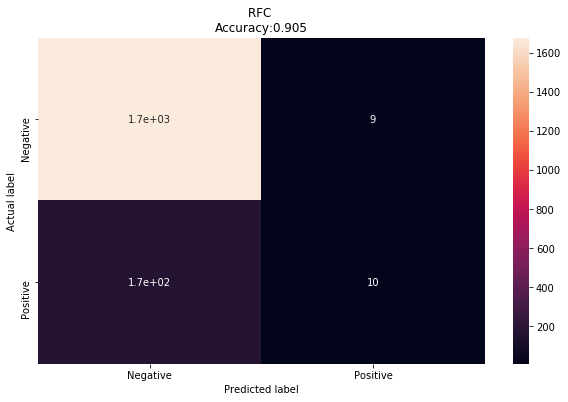

In [86]:
from plot_confusion_matrix import plot_cm

plot_cm(y_test, predictions_2, ['Negative','Positive'])

In [88]:
#saving the model
# you can you import cPickle as well to save the model
import dill
from sklearn.externals import joblib

# Save the trained model to a file so we can use it in other programs
joblib.dump(tuned_model, 'bloottest_RFC_selected_features.pkl')

#dill.dump(tuned_model, open("bloottest_RFC_selected_features.obj","wb"))

#with open("bloottest_RFC_selected_features.obj","wb") as f:
   # dill.dump(tuned_model,f)

#call the model
#model = dill.load(open(wd + "bloottest_RFC_selected_features.obj","rb"))

['bloottest_RFC_selected_features.pkl']